<a href="https://colab.research.google.com/github/read-my-name/data-analysis/blob/main/Telecom_Customer_Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'public-telecom-customer-churn-analysis-and-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F75201%2F8258007%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240421%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240421T015949Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6fb87357ba56dcdfd3204544033c64055ed3ae870760063f75bec14304544fff4bb92e5c1c16fa0e27465fd52b67e1182e45a5eab18eae2cdd9657b70387c17f06c4e735cd129153efc71ce570ea6b1acb09418a84b3769d3f4904140b33a5793b0d6b6e1149dddb1c059be0dd06ec2735b826623196a3de9dde010843622e0a58bdb6c61e087c3c39e08aea0555b339d6ebe1a1d844afd3d954c838b97631f9e36a7180f653fd6fd02938c6934ab5ef6efee0ad7efafd68f703fe832f60f8db4bec5dddd6747e97532c8ea02a0ae3c794e1e461c1e274336980412aa3e5c83e4b4006de8213da6bd449678213099b74b3e76d09225a82b057c456067bae5d32'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/public-telecom-customer-churn-analysis-and-prediction/sample_submission.csv
/kaggle/input/public-telecom-customer-churn-analysis-and-prediction/train_data.csv
/kaggle/input/public-telecom-customer-churn-analysis-and-prediction/test_data.csv


In [ ]:
# import required library
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [ ]:
# Step 1: Data Loading and Initial Exploration

df = pd.read_csv("/kaggle/input/public-telecom-customer-churn-analysis-and-prediction/train_data.csv")
train_data = pd.read_csv("/kaggle/input/public-telecom-customer-churn-analysis-and-prediction/test_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CustomerID             4020 non-null   int64   
 1   Surname                4020 non-null   object  
 2   NetworkScore           3821 non-null   float64 
 3   Region                 4020 non-null   object  
 4   Gender                 4020 non-null   object  
 5   Age                    3812 non-null   float64 
 6   Tenure                 4020 non-null   int64   
 7   MonthlyCharge          4020 non-null   float64 
 8   NumOfProducts          4020 non-null   int64   
 9   HasInternetService     4020 non-null   int64   
 10  IsActiveMember         3822 non-null   float64 
 11  EstimatedMonthlyUsage  3823 non-null   float64 
 12  Exited                 4020 non-null   int64   
 13  MonthlyChargeGroup     4020 non-null   category
 14  AgeGroup               3744 non-null   c

In [ ]:
# customer id is unique id
df['CustomerID'].nunique()

4020

In [ ]:
df['Surname'].nunique()

875

In [ ]:
df.sample(4)

,CustomerID,Surname,NetworkScore,Region,Gender,Age,Tenure,MonthlyCharge,NumOfProducts,HasInternetService,IsActiveMember,EstimatedMonthlyUsage,Exited
4004,1010,Hernandez,5.0,West,Male,53.0,8,154.47,4,0,1.0,492.85,0
1361,3167,Jackson,43.0,West,Female,NaN,19,38.45,2,1,0.0,589.48,1
2754,2629,Hampton,32.0,East,Other,57.0,13,48.28,3,0,1.0,510.48,0
3842,1852,Gregory,80.0,South,Female,63.0,7,154.44,4,1,0.0,883.96,1


In [ ]:
# Check for missing values
print(df.isnull().sum())

CustomerID                 0
Surname                    0
NetworkScore             199
Region                     0
Gender                     0
Age                      208
Tenure                     0
MonthlyCharge              0
NumOfProducts              0
HasInternetService         0
IsActiveMember           198
EstimatedMonthlyUsage    197
Exited                     0
dtype: int64


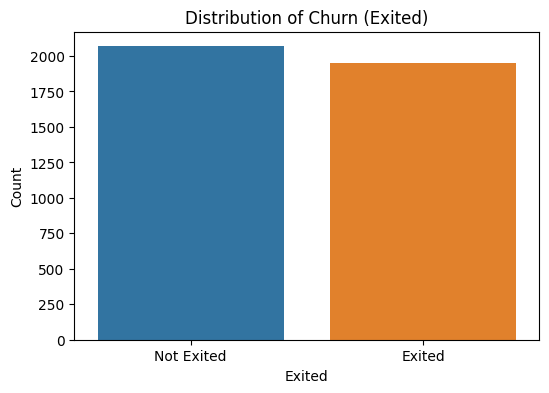

In [ ]:
# Count the number of occurrences of each class in the target variable
y = df["Exited"].value_counts()

# Plot the distribution using a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=y.index, y=y.values)
plt.title('Distribution of Churn (Exited)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Exited', 'Exited'])
plt.show()

<Axes: xlabel='NetworkScore'>

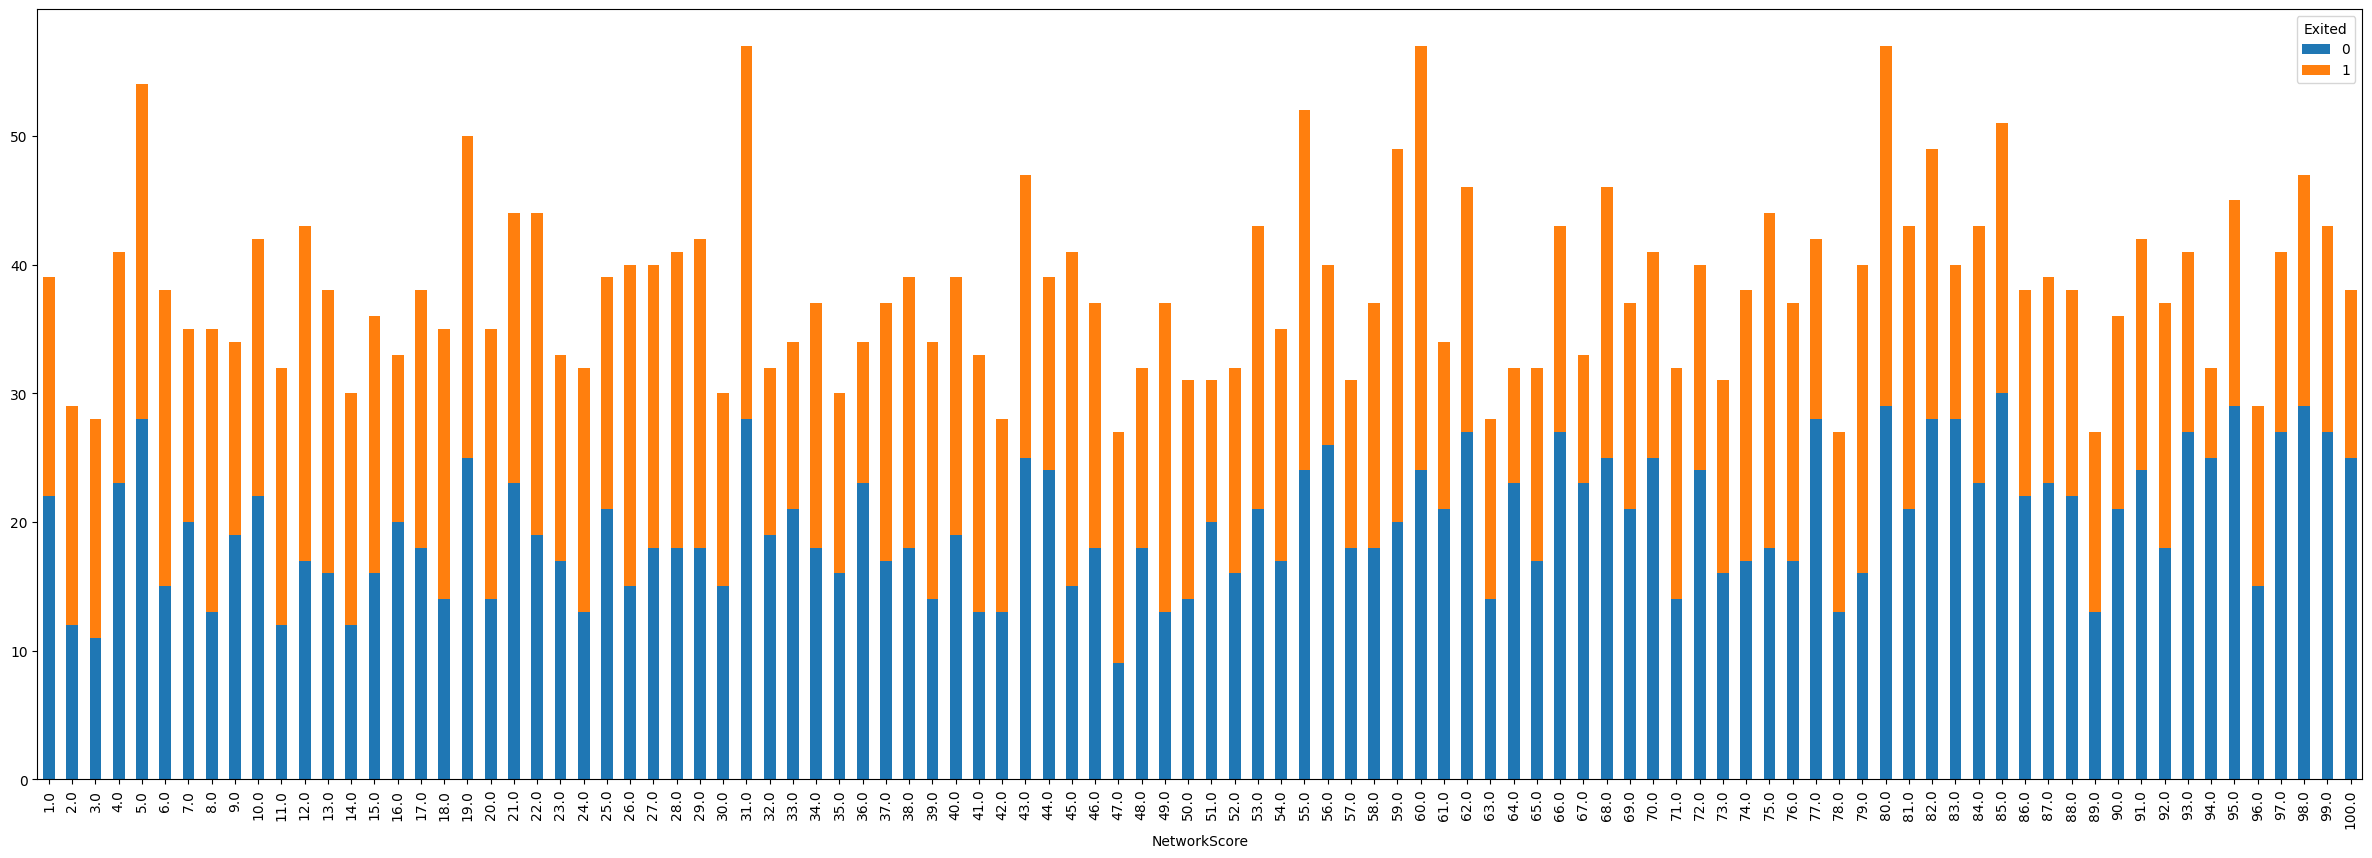

In [ ]:
df.groupby(["NetworkScore", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

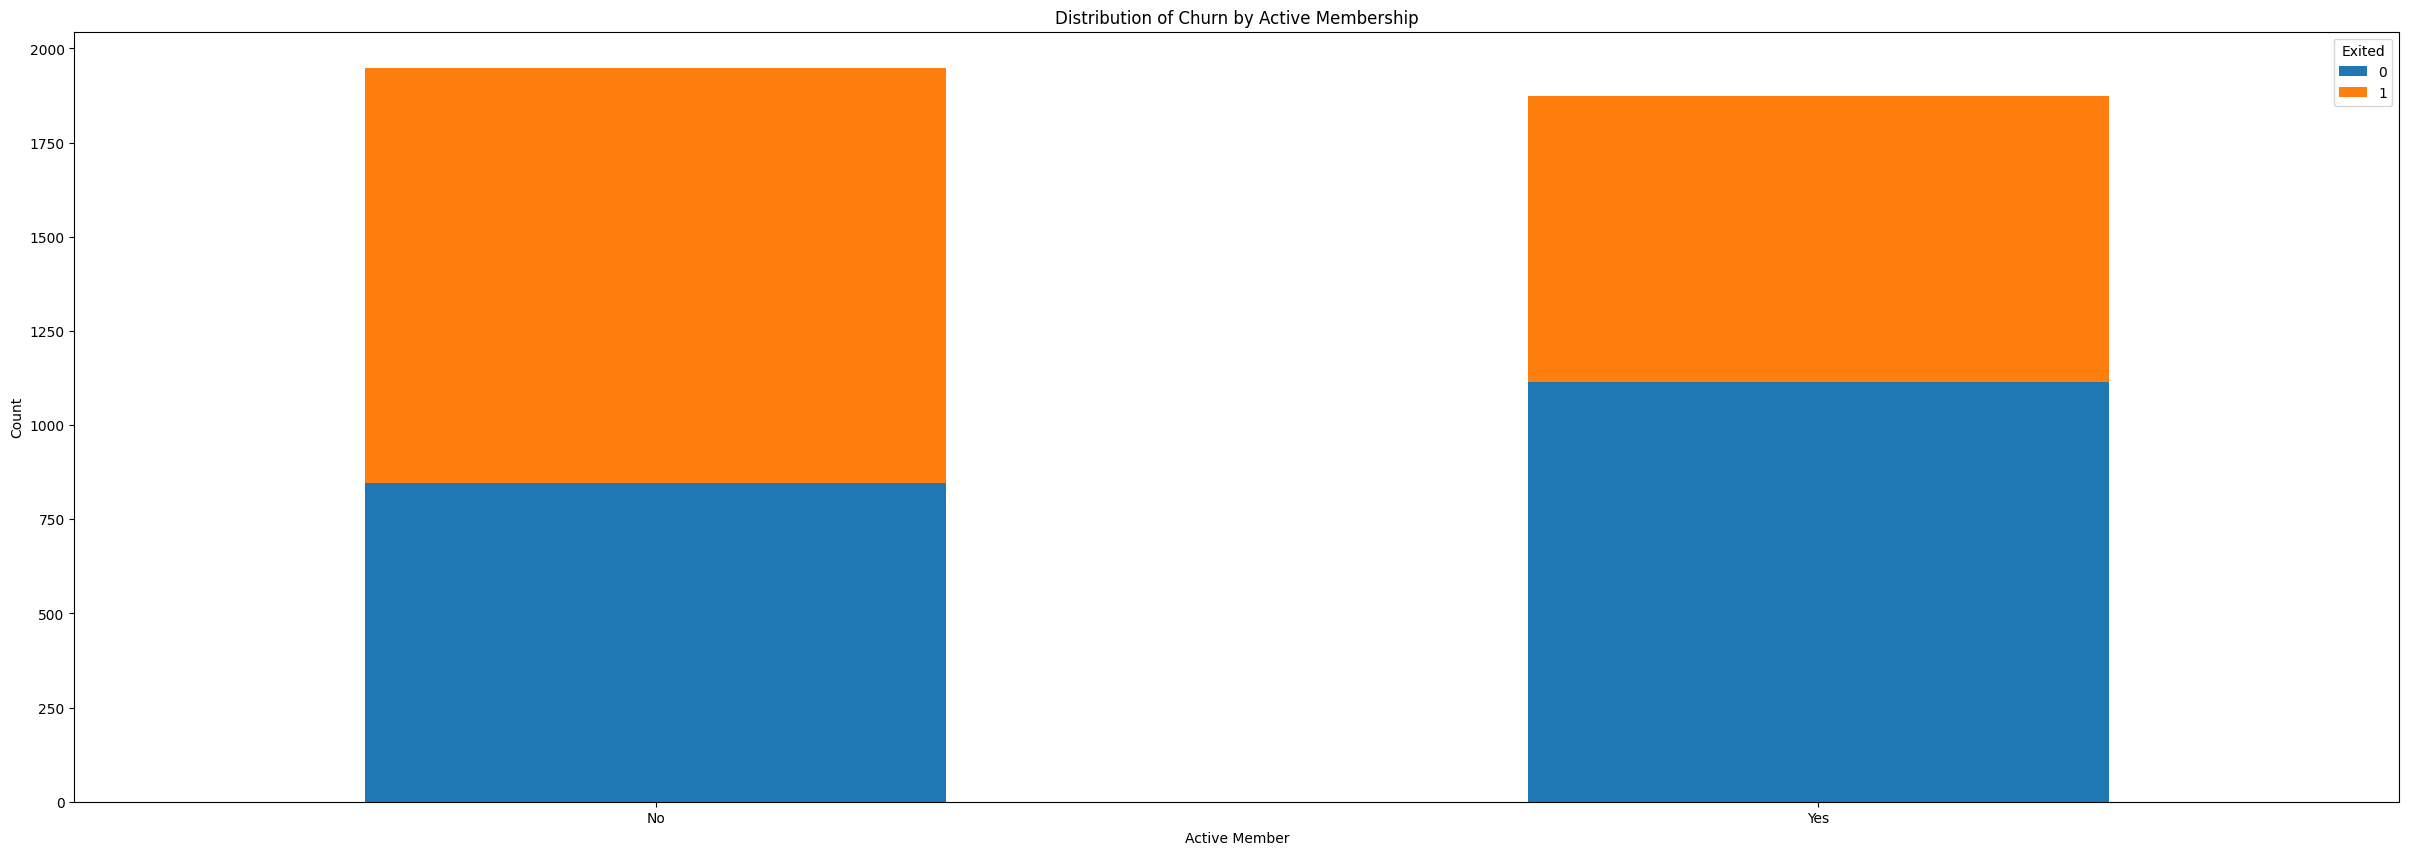

In [ ]:
ax = df.groupby(["IsActiveMember", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))
labels = ['No', 'Yes']
ax.set_xticklabels(labels, rotation=0)

plt.title('Distribution of Churn by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
# Check the maximum and minimum values for the "MonthlyCharge" variable
max_monthly_charge = df['MonthlyCharge'].max()
min_monthly_charge = df['MonthlyCharge'].min()

print("Maximum Monthly Charge:", max_monthly_charge)
print("Minimum Monthly Charge:", min_monthly_charge)

Maximum Monthly Charge: 199.96
Minimum Monthly Charge: 20.03


/tmp/ipykernel_33/3955982365.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = df.groupby(["MonthlyChargeGroup", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))


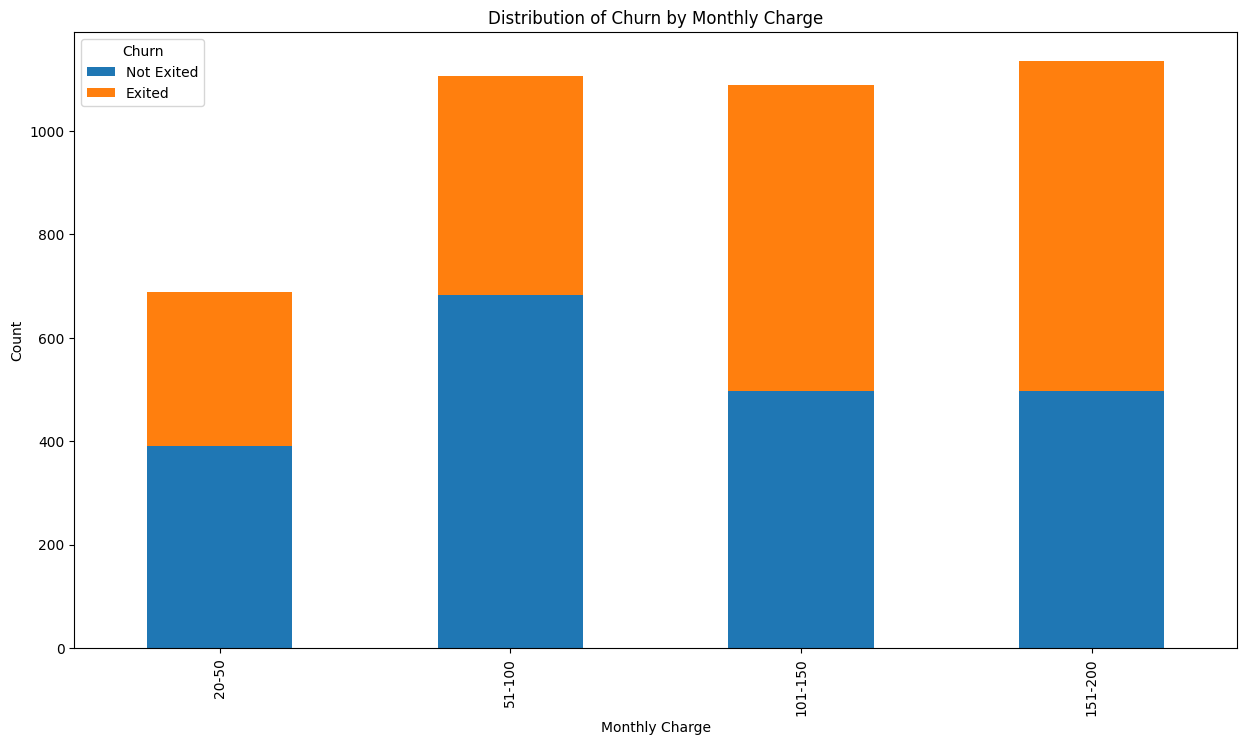

In [ ]:
# Discretize the "MonthlyCharge" variable into bins
bins = [20, 50, 100, 150, 200]  # Define bin edges
labels = ['20-50', '51-100', '101-150', '151-200']

df['MonthlyChargeGroup'] = pd.cut(df['MonthlyCharge'], bins=bins, labels=labels)

# Group the data by "MonthlyChargeGroup" and "Exited" and create a stacked bar plot
ax = df.groupby(["MonthlyChargeGroup", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))

# Set plot title and labels
plt.title('Distribution of Churn by Monthly Charge')
plt.xlabel('Monthly Charge')
plt.ylabel('Count')

# Set legend labels
ax.legend(['Not Exited', 'Exited'], title='Churn')

# Show the plot
plt.show()


In [ ]:
max_age = df['Age'].max()
min_age = df['Age'].min()

print("Maximum Age:", max_age)
print("Minimum Age:", min_age)

Maximum Age: 70.0
Minimum Age: 18.0


/tmp/ipykernel_33/1301461562.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = df.groupby(["AgeGroup", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))


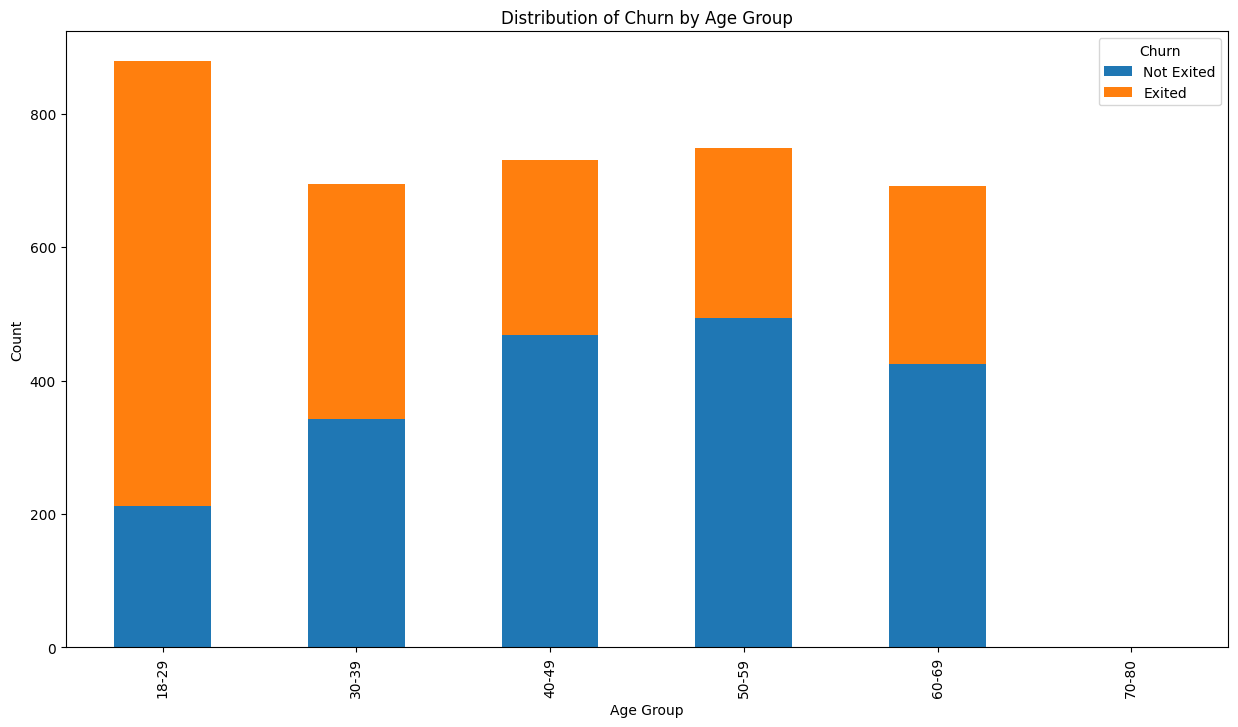

In [ ]:
# Discretize the "Age" variable into bins
bins = [18, 30, 40, 50, 60, 70, 80]  # Define bin edges
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-80']  # Define bin labels

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Group the data by "AgeGroup" and "Exited" and create a stacked bar plot
ax = df.groupby(["AgeGroup", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))

# Set plot title and labels
plt.title('Distribution of Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Set legend labels
ax.legend(['Not Exited', 'Exited'], title='Churn')

# Show the plot
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
pred = lr.predict(test_data)
print(metrics.accuracy_score(pred,test_data))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CustomerID             4020 non-null   int64   
 1   Surname                4020 non-null   object  
 2   NetworkScore           3821 non-null   float64 
 3   Region                 4020 non-null   object  
 4   Gender                 4020 non-null   object  
 5   Age                    3812 non-null   float64 
 6   Tenure                 4020 non-null   int64   
 7   MonthlyCharge          4020 non-null   float64 
 8   NumOfProducts          4020 non-null   int64   
 9   HasInternetService     4020 non-null   int64   
 10  IsActiveMember         3822 non-null   float64 
 11  EstimatedMonthlyUsage  3823 non-null   float64 
 12  Exited                 4020 non-null   int64   
 13  MonthlyChargeGroup     4020 non-null   category
 14  AgeGroup               3744 non-null   c

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             1980 non-null   int64  
 1   Surname                1980 non-null   object 
 2   NetworkScore           1879 non-null   float64
 3   Region                 1980 non-null   object 
 4   Gender                 1980 non-null   object 
 5   Age                    1888 non-null   float64
 6   Tenure                 1980 non-null   int64  
 7   MonthlyCharge          1980 non-null   float64
 8   NumOfProducts          1980 non-null   int64  
 9   HasInternetService     1980 non-null   int64  
 10  IsActiveMember         1878 non-null   float64
 11  EstimatedMonthlyUsage  1877 non-null   float64
 12  Exited                 0 non-null      float64
dtypes: float64(6), int64(4), object(3)
memory usage: 201.2+ KB
